In [5]:
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.integrate import odeint

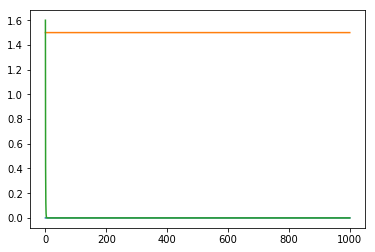

In [86]:
epsilon = 0.005
f1 = lambda x, y, z: -1.0 - y
f2 = lambda x, y, z: -2.0*(y + z)
g = lambda x, y, z: -(x + y*z + z**3)

def fast_scale(y, t):
    return np.array([epsilon*f1(y[0], y[1], y[2]), 
                     epsilon*f2(y[0], y[1], y[2]),
                     g(y[0], y[1], y[2])])

def layer(y, t):
    return np.array([0*f1(y[0], y[1], y[2]), 
                     0*f2(y[0], y[1], y[2]),
                     g(y[0], y[1], y[2])])

t = np.linspace(0, 1000, 10000)
y0 = [0, 1.5, 1.6]
yfs = odeint( fast, y0, t )
yl = odeint( layer, y0, t )

plt.plot(t, yl[:,0])
plt.plot(t, yl[:,1])
plt.plot(t, yl[:,2])
plt.show()
     

Relevant manifolds and flows

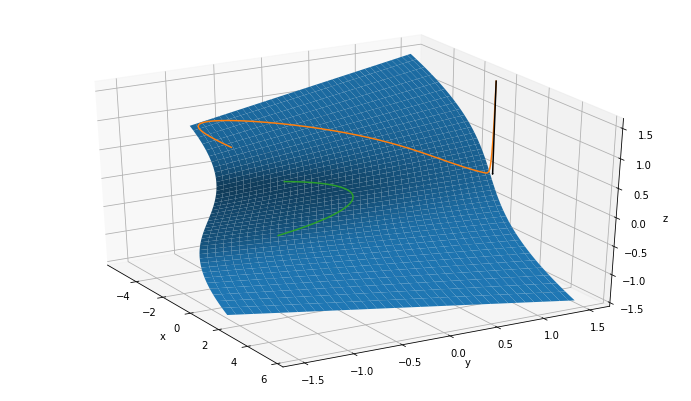

In [87]:
xf = lambda y, z: -y*z - z**3

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (12,7))

delta = 0.025
xx = yy = zz = np.arange(-1.5, 1.5, delta)
Y, Z = np.meshgrid(yy, zz)
tau = np.linspace(-0.5, 0.5, 100)
ax.plot_surface(xf(Y, Z), Y, Z, linewidth = 0)
ax.plot3D(yfs[:,0], yfs[:,1], yfs[:,2])
ax.plot3D(yl[:,0], yl[:,1], yl[:,2], 'k')
ax.plot3D(2*tau**3, -3*tau**2, tau)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, -30)
plt.show()



    
    